In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

In [3]:
# load the dataset
df=pd.read_csv(r'SALE.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,[.ShellClassInfo],Order Month,Order Month name,Purchase,city
0,248151.0,AA Batteries (4-pack),4.0,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",NaN,9,September,15.36,Los Angeles
1,248152.0,USB-C Charging Cable,2.0,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",NaN,9,September,23.90,Austin
2,248153.0,USB-C Charging Cable,1.0,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",NaN,9,September,11.95,Los Angeles
3,248154.0,27in FHD Monitor,1.0,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",NaN,9,September,149.99,Seattle
4,248155.0,USB-C Charging Cable,1.0,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",NaN,9,September,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...
71401,167140.0,Bose SoundSport Headphones,1.0,99.99,2019-03-15 12:48:00,"206 6th St, New York City, NY 10001",NaN,3,March,99.99,New York City
71402,167141.0,Bose SoundSport Headphones,1.0,99.99,2019-03-29 11:17:00,"871 Ridge St, New York City, NY 10001",NaN,3,March,99.99,New York City
71403,167142.0,AAA Batteries (4-pack),1.0,2.99,2019-03-20 09:44:00,"452 9th St, Portland, OR 97035",NaN,3,March,2.99,Portland
71404,167143.0,Bose SoundSport Headphones,1.0,99.99,2019-03-04 13:16:00,"709 Lakeview St, Portland, OR 97035",NaN,3,March,99.99,Portland


In [23]:
# Calculate total sales
total_sales = df['Purchase'].sum()

# Calculate total number of orders
total_orders = df['Order ID'].nunique()

# Calculate average sales per order
average_sales_per_order = total_sales / total_orders

# Display results
print(f"Total Sales: ${total_sales:.2f}")
print(f"Total Number of Orders: {total_orders}")
print(f"Average Sales per Order: ${average_sales_per_order:.2f}")

Total Sales: $13186473.51
Total Number of Orders: 68476
Average Sales per Order: $192.57


In [4]:
# create new column
df['Purchase']=df['Quantity Ordered']*df['Price Each']

ndf=df.groupby(['Order Month','Order Month name']).agg(Total_sale=('Purchase','sum'))
ndf=ndf.reset_index()

In [5]:
ndf.to_csv('monthlysales.csv',index=False)

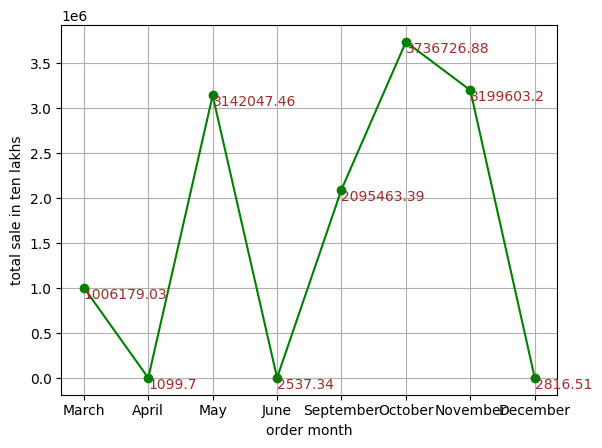

In [6]:
plt.plot(ndf['Order Month name'],ndf['Total_sale'],marker='o',color='green')
plt.xlabel('order month')
plt.ylabel('total sale in ten lakhs')
plt.grid()

for x,y in zip(ndf['Order Month name'],ndf['Total_sale']):
    plt.text(x,y,y, va='top',ha='left',color='brown')
plt.show()

In [7]:
df['city']=df['Purchase Address'].str.split(',',expand=True)[1]

df.to_csv('SALE.csv',index=False)

In [8]:
revenue_by_city = df.groupby('city')['Purchase'].sum().sort_values(ascending=False)
revenue_by_city

city
San Francisco    3132336.37
Los Angeles      2124078.48
New York City    1780065.24
Boston           1392405.63
Atlanta          1076845.34
Dallas           1069858.00
Seattle          1024675.94
Portland          892763.74
Austin            693444.77
Name: Purchase, dtype: float64

Time of Day Analysis

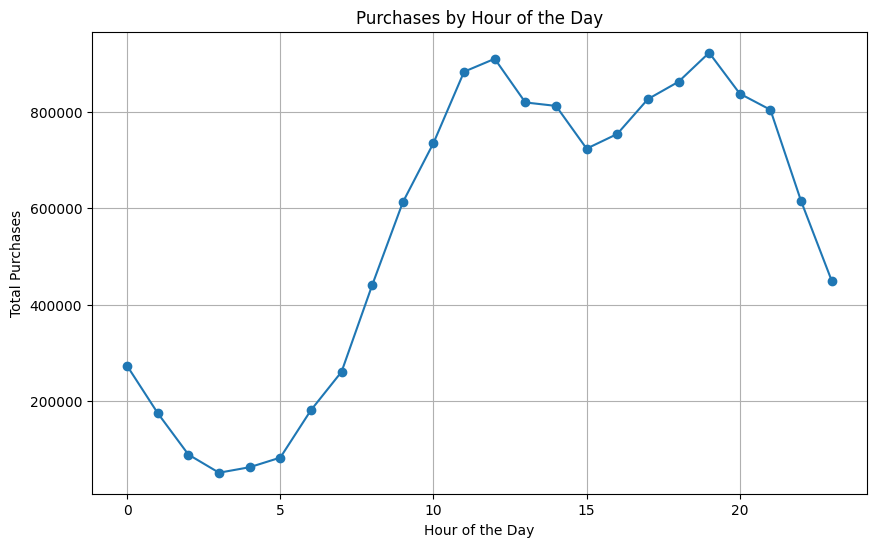

In [9]:
#Time of Day Analysis
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract hour from 'Order Date'
df['Order Hour'] = df['Order Date'].dt.hour
purchases_by_hour = df.groupby('Order Hour')['Purchase'].sum()

plt.figure(figsize=(10, 6))
plt.plot(purchases_by_hour.index, purchases_by_hour.values, marker='o')
plt.title('Purchases by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Purchases')
plt.grid(True)
plt.show()


Day of the Week analysis

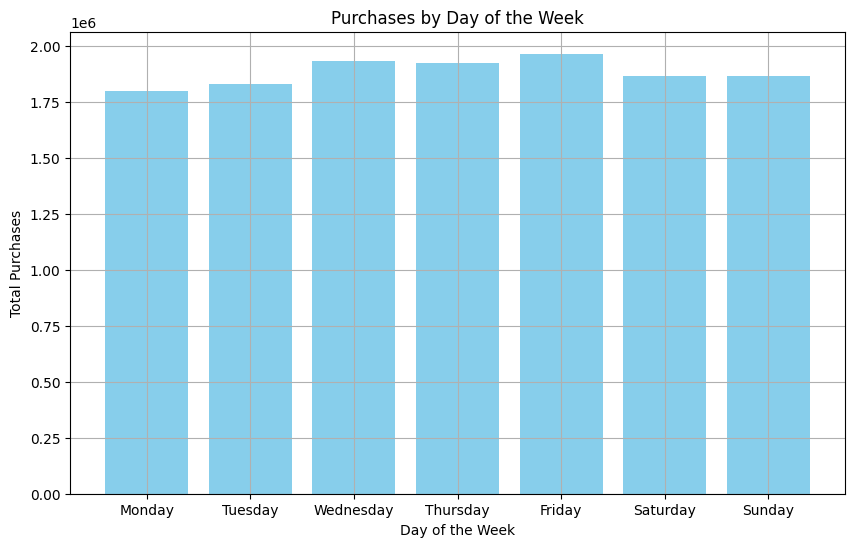

In [10]:
# Day of the Week analysis
df['Order Day'] = df['Order Date'].dt.day_name()

purchases_by_day = df.groupby('Order Day')['Purchase'].sum()

purchases_by_day = purchases_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
plt.bar(purchases_by_day.index, purchases_by_day.values, color='skyblue')
plt.title('Purchases by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Purchases')
plt.grid(True)
plt.show()


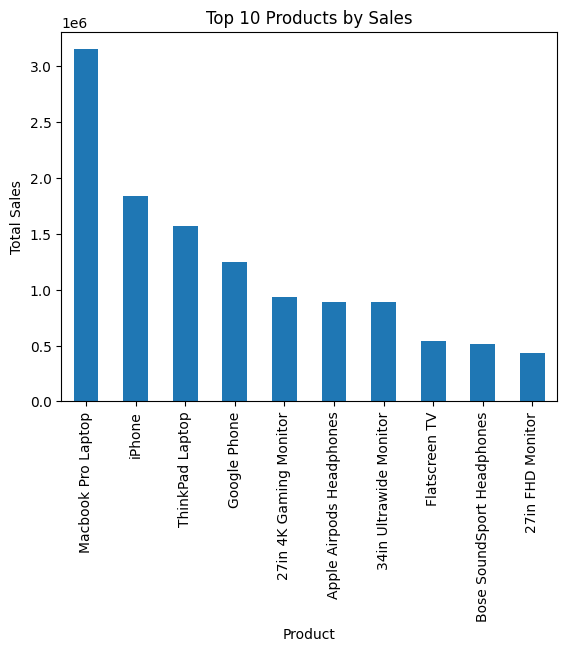

In [11]:
# top 10 products by sales
product_sales = df.groupby('Product')['Purchase'].sum().sort_values(ascending=False)

product_sales.head(10).plot(kind='bar', title='Top 10 Products by Sales', ylabel='Total Sales', xlabel='Product')
plt.show()


Seasonality Analysis

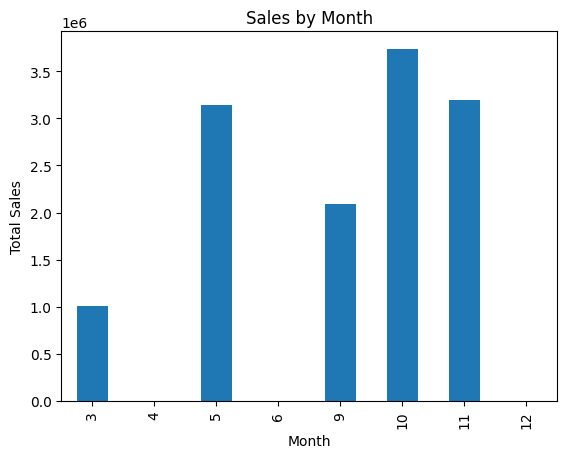

In [13]:
monthly_sales = df.groupby('Order Month')['Purchase'].sum()

monthly_sales.plot(kind='bar', title='Sales by Month', ylabel='Total Sales', xlabel='Month')
plt.show()


correlation analysis

In [16]:
correlation_matrix = df[['Quantity Ordered', 'Price Each', 'Purchase']].corr()

print(correlation_matrix)



                  Quantity Ordered  Price Each  Purchase
Quantity Ordered          1.000000   -0.147274 -0.138784
Price Each               -0.147274    1.000000  0.999350
Purchase                 -0.138784    0.999350  1.000000


city wise performance analysis

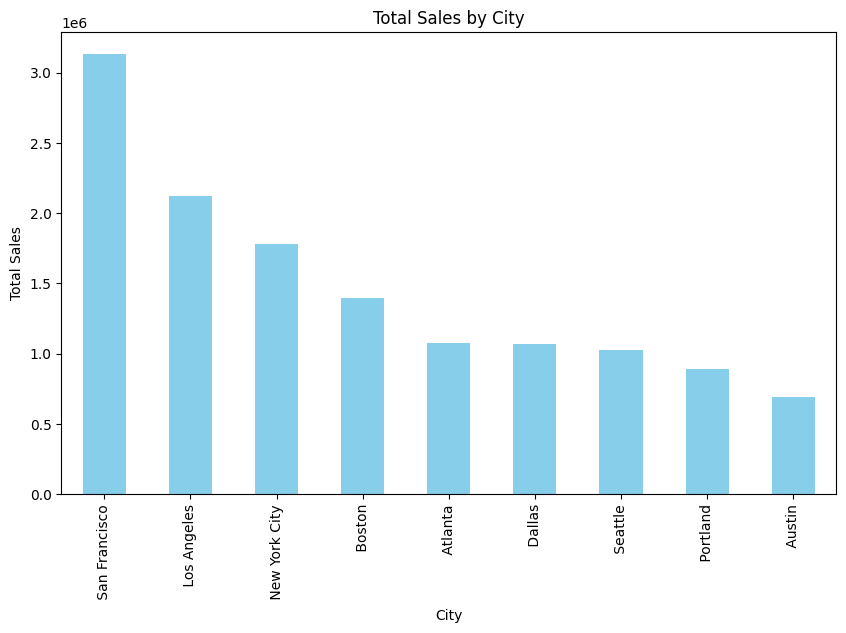

Top 10 Cities by Total Sales:
 city
San Francisco    3132336.37
Los Angeles      2124078.48
New York City    1780065.24
Boston           1392405.63
Atlanta          1076845.34
Dallas           1069858.00
Seattle          1024675.94
Portland          892763.74
Austin            693444.77
Name: Purchase, dtype: float64


In [ ]:
city_sales = df.groupby('city')['Purchase'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
city_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

# Top 10 cities by sales
top_cities = city_sales.head(10)
print("Top 10 Cities by Total Sales:\n", top_cities)

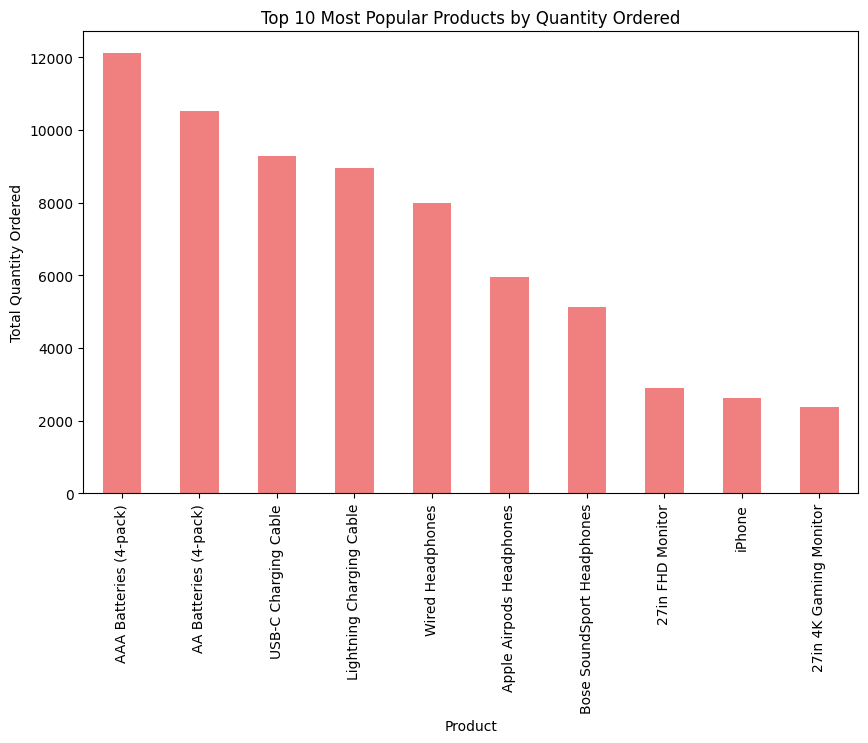

Top 10 Most Popular Products by Quantity Ordered:
 Product
AAA Batteries (4-pack)        12103.0
AA Batteries (4-pack)         10524.0
USB-C Charging Cable           9275.0
Lightning Charging Cable       8939.0
Wired Headphones               7999.0
Apple Airpods Headphones       5953.0
Bose SoundSport Headphones     5114.0
27in FHD Monitor               2900.0
iPhone                         2626.0
27in 4K Gaming Monitor         2385.0
Name: Quantity Ordered, dtype: float64


In [20]:
# Product Popularity
# most popular products by quantity ordered
product_popularity = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
product_popularity.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most Popular Products by Quantity Ordered')
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=90)
plt.show()

print("Top 10 Most Popular Products by Quantity Ordered:\n", product_popularity.head(10))


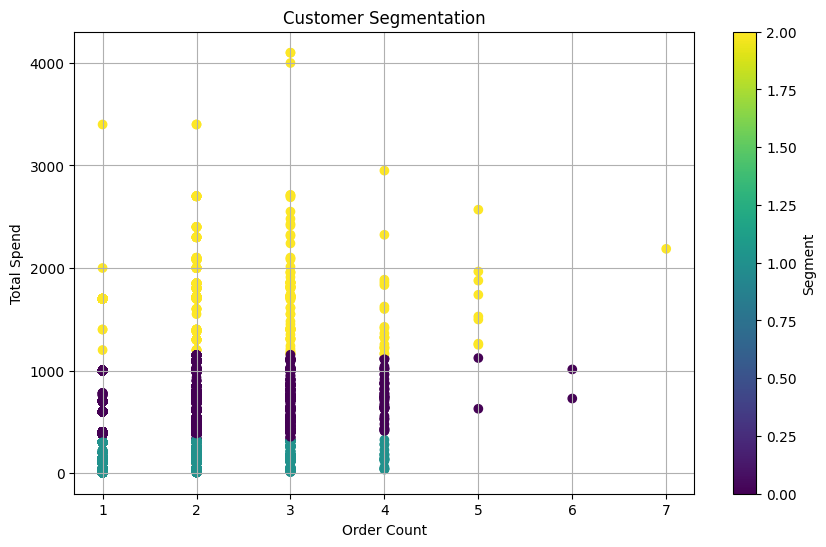

Segment 1:
                                     Total Spend  Order Count  Unique Orders  \
Purchase Address                                                              
1 11th St, Atlanta, GA 30301              11.95            1              1   
1 12th St, Los Angeles, CA 90001         150.00            1              1   
1 12th St, New York City, NY 10001        11.99            1              1   
1 12th St, San Francisco, CA 94016        11.99            1              1   
1 14th St, New York City, NY 10001        14.95            1              1   

                                    Segment  
Purchase Address                             
1 11th St, Atlanta, GA 30301              1  
1 12th St, Los Angeles, CA 90001          1  
1 12th St, New York City, NY 10001        1  
1 12th St, San Francisco, CA 94016        1  
1 14th St, New York City, NY 10001        1   

Segment 2:
                                        Total Spend  Order Count  \
Purchase Address               

In [21]:
from sklearn.cluster import KMeans

customer_data = df.groupby('Purchase Address').agg({'Purchase': ['sum', 'count'],'Order ID': 'nunique'})

# Flatten the MultiIndex columns
customer_data.columns = ['Total Spend', 'Order Count', 'Unique Orders']

# Perform clustering to segment customers
kmeans = KMeans(n_clusters=3, random_state=0).fit(customer_data)
customer_data['Segment'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(customer_data['Order Count'], customer_data['Total Spend'], c=customer_data['Segment'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Order Count')
plt.ylabel('Total Spend')
plt.colorbar(label='Segment')
plt.grid(True)
plt.show()

for segment in customer_data['Segment'].unique():
    print(f"Segment {segment}:\n", customer_data[customer_data['Segment'] == segment].head(5), "\n")
